<div style="text-align: center; color: #ffffff; font-family: Babas; font-size: 3em;">02. OCA SECTION - TRANSTENSIVE FAULT</div>
<div style="text-align: left; color: #ffffff; font-family: Babas; font-size: 2.5em;">DESCRIPTION</div>
<div style="text-align: left; color: #ffffff; font-family: Babas; font-size: 2em; border-bottom: 1px solid white;">The selected area come from a cross section traced NW - SE in "Plancha 13- Dibulla" from SGC (Servicio Geológico Colombiano). This section represents the "OCA" strike-slipe fault affecting a a quaternary deposit (Qal), neogene lithology (N1m) and the basement (PEm). In this section there are 2 strike-slip faults with dextral component.</div>

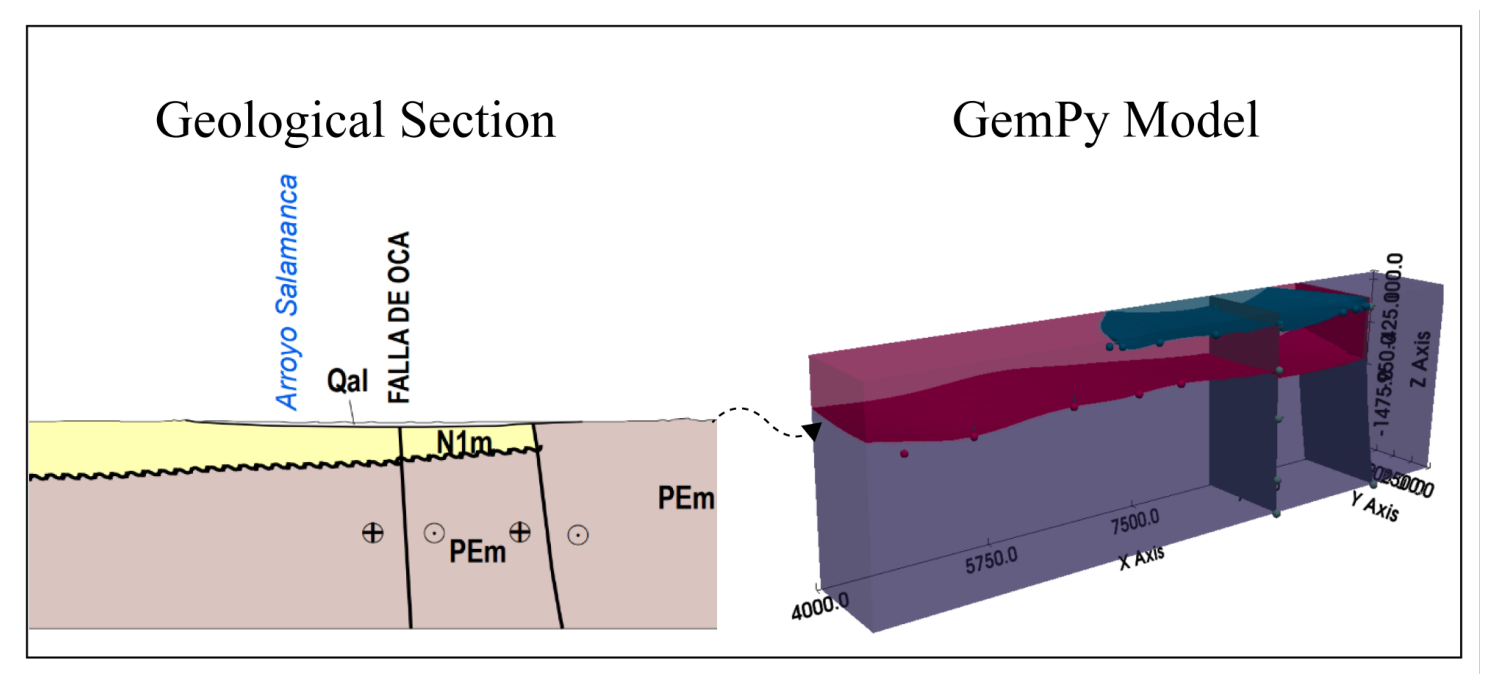

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('model_oca.png')
plt.figure(figsize=(15, 15))
imgplot = plt.imshow(img)
plt.axis('off')
plt.tight_layout()

In [2]:
import gempy as gp 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
import pyvista
import matplotlib.image as mpimg

No module named 'osgeo'


In [3]:
img= mpimg.imread('OCA_area.png')

In [6]:
geo_model = gp.create_data('OCA',
                           extent = [4000, 10500, 0, 1000, -2000, 100],
                           resolution = [100, 50, 100],
                           path_o='Orientaciones_OCA_GO.txt',
                           path_i='Superficies_OCA_GO.txt')

Active grids: ['regular']


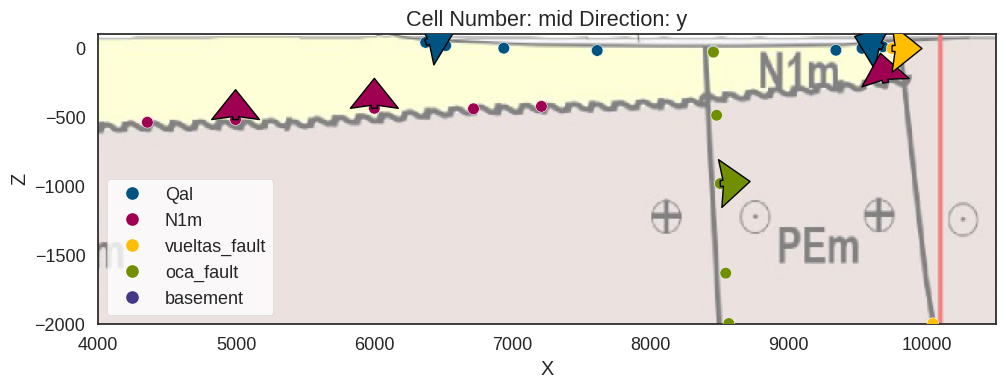

In [7]:
p2d = gp.plot_2d(geo_model, show=False)
p2d.axes[0].imshow(img, origin='upper', alpha=0.5, extent=(-1910, 10550, -3900, 4600))
plt.show()

In [8]:
geo_model.surface_points

,X,Y,Z,smooth,surface
0,6371.4729,0,37.0037,0.000002,Qal
1,6516.7387,0,14.3987,0.000002,Qal
2,6937.0571,0,-4.6371,0.000002,Qal
3,7612.9249,0,-21.4609,0.000002,Qal
4,8453.3188,0,-27.5418,0.000002,Qal
5,9341.2271,0,-19.5759,0.000002,Qal
6,9529.9724,0,-5.4188,0.000002,Qal
7,9680.8839,0,5.9006,0.000002,Qal
8,8453.3188,900,-27.5418,0.000002,Qal
9,4356.9867,0,-540.8908,0.000002,N1m


In [9]:
geo_model.orientations

,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,6371.4729,0,37.0037,9.396926e-01,1.000058e-12,3.420201e-01,0.01,Qal
1,9680.8839,0,5.9006,-9.396926e-01,9.998274e-13,3.420201e-01,0.01,Qal
2,4995.4217,0,-521.6307,1.000000e-12,5.233596e-02,9.986295e-01,0.01,N1m
3,6000.0000,0,-440.0000,1.000000e-12,1.000000e-12,1.000000e+00,0.01,N1m
4,9700.4094,0,-254.6393,-1.736482e-01,9.999681e-13,9.848078e-01,0.01,N1m
6,9747.5428,0,-6.9245,1.000000e+00,1.000061e-12,1.000061e-12,0.01,vueltas_fault
5,8503.5697,0,-984.7405,9.975641e-01,1.000061e-12,6.975647e-02,0.01,oca_fault


In [10]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Qal,Default series,1,#015482,1
1,N1m,Default series,2,#9f0052,2
2,vueltas_fault,Default series,3,#ffbe00,3
3,oca_fault,Default series,4,#728f02,4
4,basement,Basement,1,#443988,5


In [11]:
gp.map_stack_to_surfaces(geo_model,
                         {"oca_fault":('oca_fault'),
                          "vueltas_fault":('vueltas_fault'),
                          "Strat_Series": ('Qal', 'N1m')})

,surface,series,order_surfaces,color,id
3,oca_fault,oca_fault,1,#728f02,1
2,vueltas_fault,vueltas_fault,1,#ffbe00,2
0,Qal,Strat_Series,1,#015482,3
1,N1m,Strat_Series,2,#9f0052,4
4,basement,Basement,1,#443988,5


In [12]:
geo_model.rename_surfaces({'basement':'PEm'})

,surface,series,order_surfaces,color,id
3,oca_fault,oca_fault,1,#728f02,1
2,vueltas_fault,vueltas_fault,1,#ffbe00,2
0,Qal,Strat_Series,1,#015482,3
1,N1m,Strat_Series,2,#9f0052,4
4,PEm,Basement,1,#443988,5


In [13]:
geo_model.set_is_fault(['oca_fault','vueltas_fault'])

Fault colors changed. If you do not like this behavior, set change_color to False.
Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
oca_fault,1,Fault,True,True,False
vueltas_fault,2,Fault,True,True,False
Strat_Series,3,Erosion,True,False,False
Basement,4,Erosion,False,False,False


In [14]:
geo_model.series

,order_series,BottomRelation,isActive,isFault,isFinite
oca_fault,1,Fault,True,True,False
vueltas_fault,2,Fault,True,True,False
Strat_Series,3,Erosion,True,False,False
Basement,4,Erosion,False,False,False


In [15]:
geo_model.stack

,order_series,BottomRelation,isActive,isFault,isFinite
oca_fault,1,Fault,True,True,False
vueltas_fault,2,Fault,True,True,False
Strat_Series,3,Erosion,True,False,False
Basement,4,Erosion,False,False,False


In [16]:
geo_model.grid

Grid Object. Values: 
array([[ 4.03250e+03,  1.00000e+01, -1.98950e+03],
       [ 4.03250e+03,  1.00000e+01, -1.96850e+03],
       [ 4.03250e+03,  1.00000e+01, -1.94750e+03],
       ...,
       [ 1.04675e+04,  9.90000e+02,  4.75000e+01],
       [ 1.04675e+04,  9.90000e+02,  6.85000e+01],
       [ 1.04675e+04,  9.90000e+02,  8.95000e+01]])

In [17]:
gp.set_interpolator(
    geo_model,
    output=['geology'],
    theano_optimizer='fast compile')

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  2
Compilation Done!
Kriging values: 
                          values
range               6903.622238
$C_o$            1134761.904762
drift equations    [3, 3, 3, 3]


In [18]:
gp.get_data(geo_model, 'orientations')

,X,Y,Z,G_x,G_y,G_z,smooth,surface
5,8503.5697,0,-984.7405,9.975641e-01,1.000061e-12,6.975647e-02,0.01,oca_fault
6,9747.5428,0,-6.9245,1.000000e+00,1.000061e-12,1.000061e-12,0.01,vueltas_fault
0,6371.4729,0,37.0037,9.396926e-01,1.000058e-12,3.420201e-01,0.01,Qal
1,9680.8839,0,5.9006,-9.396926e-01,9.998274e-13,3.420201e-01,0.01,Qal
2,4995.4217,0,-521.6307,1.000000e-12,5.233596e-02,9.986295e-01,0.01,N1m
3,6000.0000,0,-440.0000,1.000000e-12,1.000000e-12,1.000000e+00,0.01,N1m
4,9700.4094,0,-254.6393,-1.736482e-01,9.999681e-13,9.848078e-01,0.01,N1m


/home/ana/anaconda3/envs/gempyv2/lib/python3.10/site-packages/gempy/plot/plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


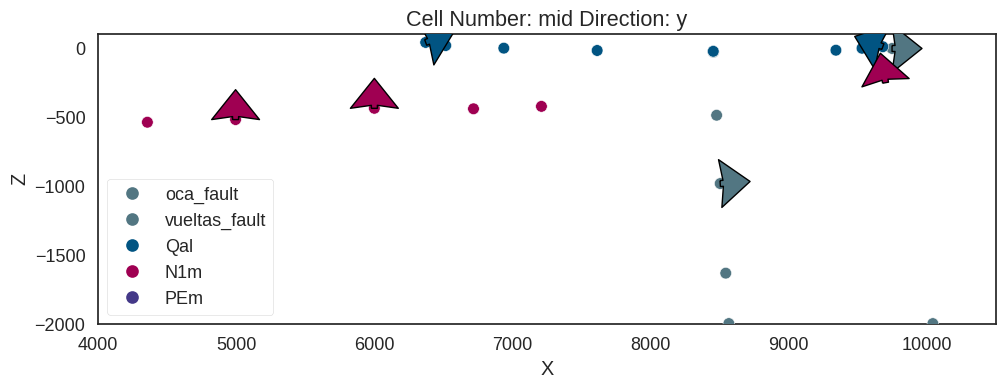

In [19]:
plot = gp.plot_2d(geo_model, show_lith=False, show_boundaries=False)
plt.show()

In [20]:
gp.get_data(geo_model, 'kriging')

,values
range,6903.622238
$C_o$,1134761.904762
drift equations,"[3, 3, 3, 3]"


In [21]:
sol = gp.compute_model(geo_model)

In [22]:
geo_model.solutions


Lithology ids 
  [5. 5. 5. ... 5. 5. 5.] 

### 2D MODEL SECTION

/home/ana/anaconda3/envs/gempyv2/lib/python3.10/site-packages/gempy/plot/plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


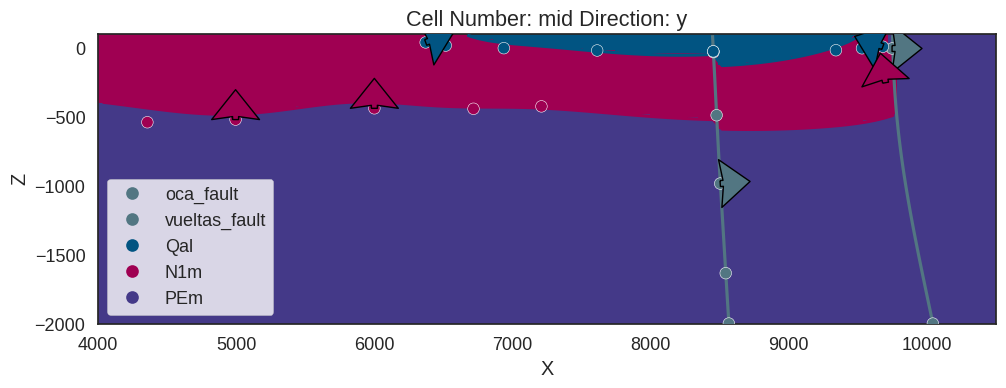

In [24]:
gp.plot_2d(geo_model, show_data=True)
plt.savefig('section_2D.png', dpi=300, bbox_inches='tight')
plt.show()

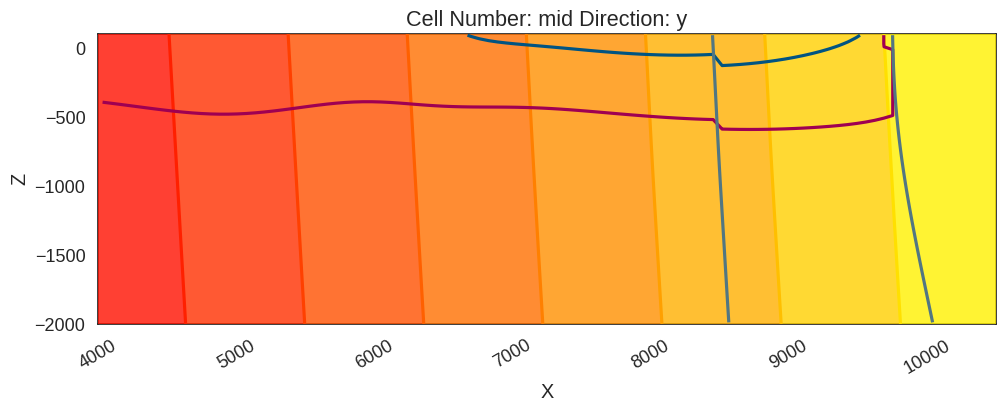

In [25]:
gp.plot_2d(geo_model, show_data=False, show_scalar=True, show_lith=False)
plt.show()

/home/ana/anaconda3/envs/gempyv2/lib/python3.10/site-packages/gempy/plot/plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


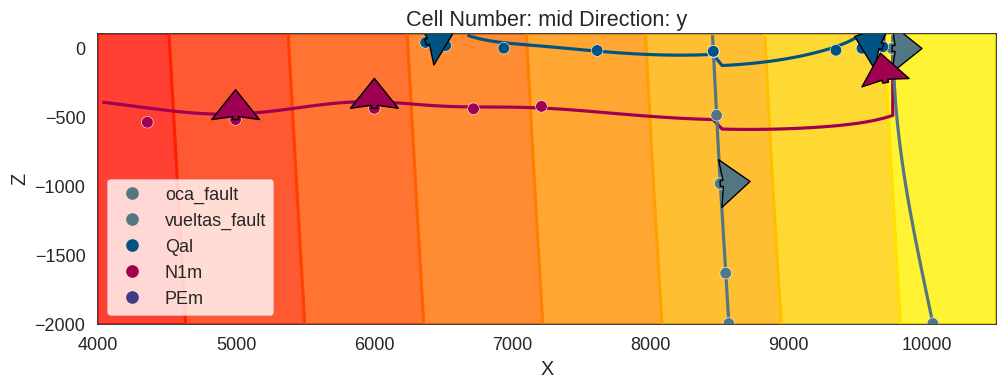

In [26]:
gp.plot_2d(geo_model, series_n=0, show_data=True, show_scalar=True, show_lith=False)
plt.show()

### 3D GEOLOGICAL MODEL

In [27]:
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic')

In [28]:
geo_model.solutions.scalar_field_at_surface_points

array([[1.28645241e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.57828948e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 4.34637019e+03, 4.34628337e+03]])

In [30]:
# save 3D model
import pickle
pickle.dump(geo_model, open("oca_GO.p", "wb"))

In [42]:
# load the model to check its ok
modelo = pickle.load(open("oca_GO.p", "rb"))

# B. ASSIGNMENT OF GEOPHYSICAL PROPERTIES

In [32]:
modelo.surfaces

,surface,series,order_surfaces,color,id
3,oca_fault,oca_fault,1,#527682,1
2,vueltas_fault,vueltas_fault,1,#527682,2
0,Qal,Strat_Series,1,#015482,3
1,N1m,Strat_Series,2,#9f0052,4
4,PEm,Basement,1,#443988,5


In [44]:
# assign geophysics properties
#modelo.add_surface_values([2500, 2500, 8008, 2000, 2500], ['vp'])  #m/s vp
modelo.add_surface_values([1.8, 1.8, 1.8, 2.5, 3.3], ['density'])  #g/cm3 density
modelo.surfaces

,surface,series,order_surfaces,color,id,density
3,oca_fault,oca_fault,1,#527682,1,1.800000
2,vueltas_fault,vueltas_fault,1,#527682,2,1.800000
0,Qal,Strat_Series,1,#015482,3,1.800000
1,N1m,Strat_Series,2,#9f0052,4,2.500000
4,PEm,Basement,1,#443988,5,3.300000


/home/ana/anaconda3/envs/gempyv2/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


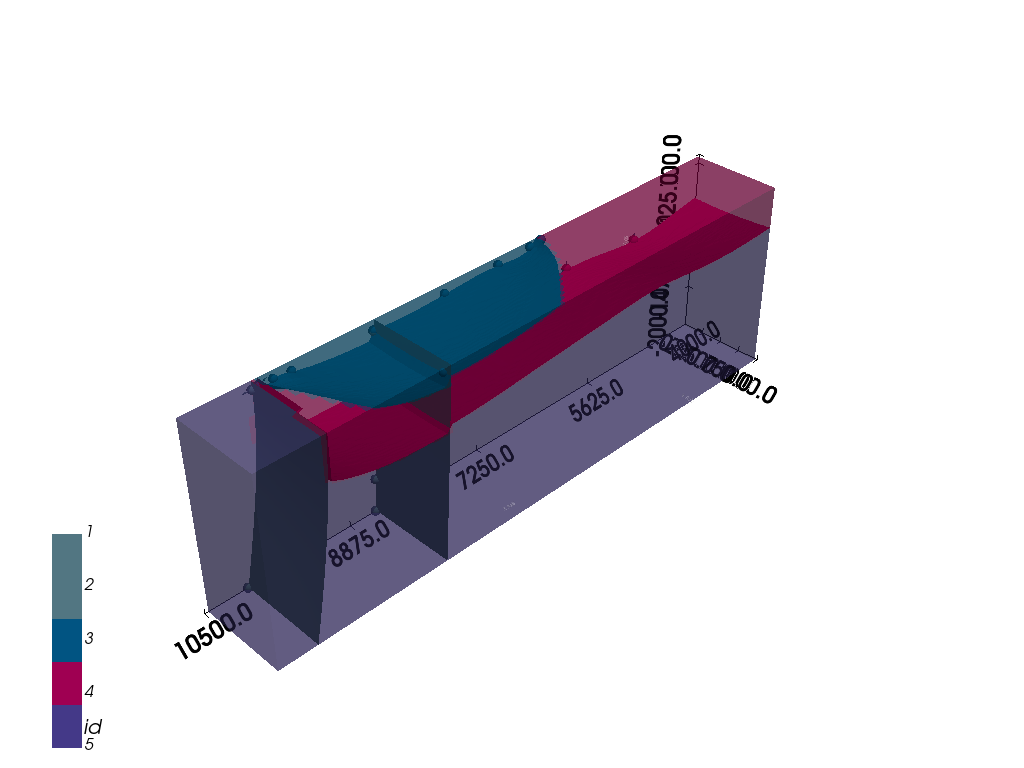

[StructuredGrid (0x7a2b3eb5ef80)
   N Cells:      480249
   N Points:     500000
   X Bounds:     4.032e+03, 1.047e+04
   Y Bounds:     1.000e+01, 9.900e+02
   Z Bounds:     -1.990e+03, 8.950e+01
   Dimensions:   100, 50, 100
   N Arrays:     1,

In [45]:
p3d = gp.plot_3d(modelo, notebook=True)
p3d.plot_data()

sol = gp.compute_model(modelo)

p3d.plot_surfaces()
# Plot the lithological units
p3d.plot_structured_grid('lith')

In [46]:
sol.values_matrix #compute geophysics properties

array([[3.3, 3.3, 3.3, ..., 3.3, 3.3, 3.3]])

In [47]:
# Reshaping our data 
import numpy as np
shape = [100,50,100]
reshaped = np.reshape(sol.values_matrix, shape, order='C')
modelo_propiedades = np.flip(reshaped, axis=2).T
modelo_propiedades.shape

(100, 50, 100)

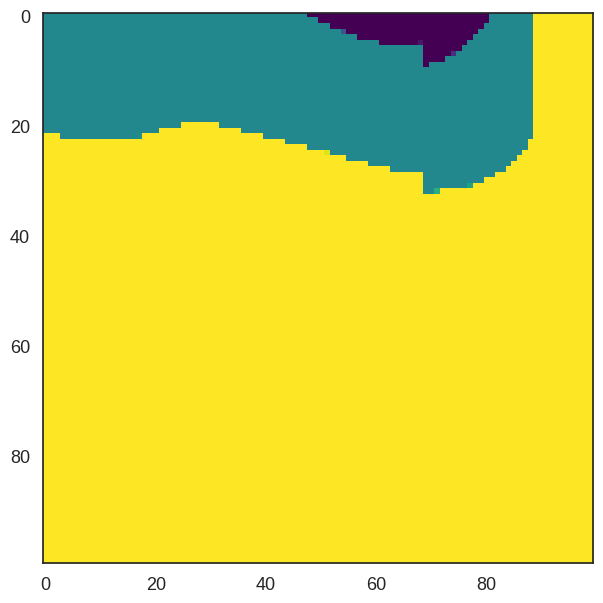

In [48]:
plt.imshow(modelo_propiedades[:,49,:], cmap='viridis')

In [49]:
np.save('densidad.npy', modelo_propiedades)
#np.save('vp.npy', modelo_propiedades)

In [50]:
xp =np.load('densidad.npy')
#xp =np.load('vp.npy')

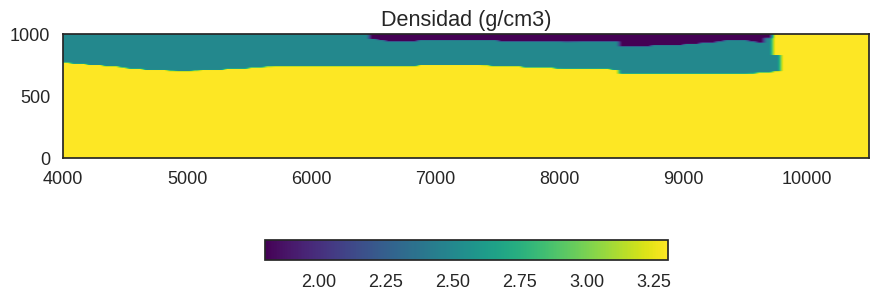

In [51]:
import matplotlib.pyplot as plt


plt.imshow(xp[:,0,:], cmap='viridis', extent=[4000, 10500, 0, 1000, -2000, 100])
#plt.title('Velocidad de Onda P (m/s)')
plt.title('Densidad (g/cm3)')
plt.colorbar(location="bottom", shrink=0.5)
#plt.savefig('vp.png', dpi=300, bbox_inches='tight')
plt.savefig('densidad.png', dpi=300, bbox_inches='tight')
plt.show()

# C. ERROR PROPAGATION WITH MONTE CARLO METHOD

In [61]:
indices_bool = geo_model.surface_points.df['surface'].isin(['Qal','N1m','PEm'])

In [70]:
indices = geo_model.surface_points.df.index[indices_bool]
indices

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [71]:
Z_init = geo_model.surface_points.df.loc[(indices, ['Z', 'surface'])].copy()

In [72]:
df = pd.DataFrame(Z_init)

In [73]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
3,oca_fault,oca_fault,1,#527682,1
2,vueltas_fault,vueltas_fault,1,#527682,2
0,Qal,Strat_Series,1,#015482,3
1,N1m,Strat_Series,2,#9f0052,4
4,PEm,Basement,1,#443988,5


In [74]:
# Filter DataFrame
capa1 = df[df['surface'] == 'Qal']['Z']
capa2 = df[df['surface'] == 'N1m']['Z']
capa3 = df[df['surface'] == 'PEm']['Z']

In [75]:
def sample(silent=True):
    Z_var = np.random.normal(0, 30, size=3)
    Z_loc = np.hstack([capa1 + Z_var[0],
                       capa2 + Z_var[1],
                       capa3 + Z_var[2]])
    
    if silent:
        geo_model.modify_surface_points(indices, Z=Z_loc)
        gp.compute_model(geo_model)
    else:
        # Create an object
        plot_object = gp.plot_2d(geo_model)
        
        # Pass the object as argument of modify_surface_points
        geo_model.modify_surface_points(indices, Z=Z_loc, plot_object=plot_object)
    
    return geo_model.solutions.lith_block

In [76]:
lith_blocks = np.array([])
n_iterations = 10  # Number of iterations

for i in range(n_iterations):
    lith_blocks = np.append(lith_blocks, sample())

In [77]:
lith_blocks = lith_blocks.reshape(n_iterations, -1)
lith_blocks.shape, lith_blocks

((10, 500000),
 array([[5., 5., 5., ..., 5., 5., 5.],
        [5., 5., 5., ..., 5., 5., 5.],
        [5., 5., 5., ..., 5., 5., 5.],
        ...,
        [5., 5., 5., ..., 5., 5., 5.],
        [5., 5., 5., ..., 5., 5., 5.],
        [5., 5., 5., ..., 5., 5., 5.]]))

In [78]:
from gempy.bayesian.fields import compute_prob, calculate_ie_masked
prob_block = compute_prob(lith_blocks)

/home/ana/anaconda3/envs/gempyv2/lib/python3.10/site-packages/gempy/bayesian/fields.py:8: UserWarning: This function is Deprecated, please use the probability function instead
  warnings.warn("This function is Deprecated, please use the probability function instead")


/home/ana/anaconda3/envs/gempyv2/lib/python3.10/site-packages/gempy/plot/plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


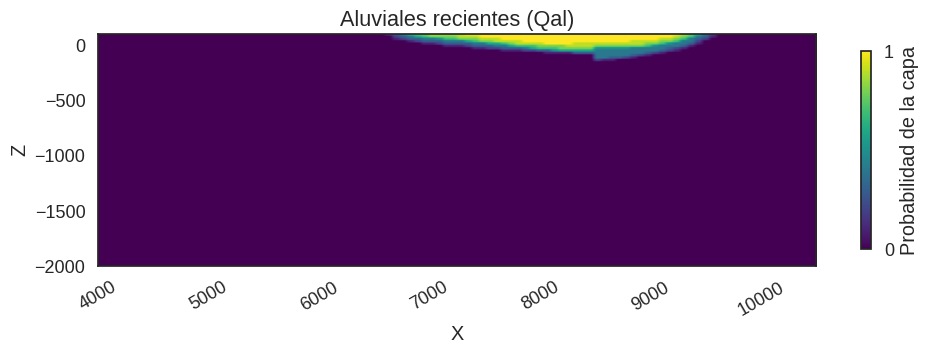

In [79]:
layer = 0
p2dp = gp.plot_2d(geo_model,
                  show_lith=False, show_boundaries=False,
                  show_data=False,
                  regular_grid=prob_block[layer],
                  kwargs_regular_grid={'cmap': 'viridis', 'norm': None})

prob_min = prob_block[layer].min()  # Minimum value of probability
prob_max = prob_block[layer].max()  # Maximum value of probability

# Create some sample data
data = np.random.rand(50, 50)

# Create plot
mappable = plt.imshow(data, cmap='viridis')
plt.title('Aluviales recientes (Qal)')
colorbar = plt.colorbar(mappable, shrink=0.3)
colorbar.set_ticks([0, 1])  # Define ticks location
colorbar.set_label('Probabilidad de la capa')  

# Save plot
plt.savefig('Probabilidad_Qal_GO.png', dpi=300, bbox_inches='tight')
plt.show()

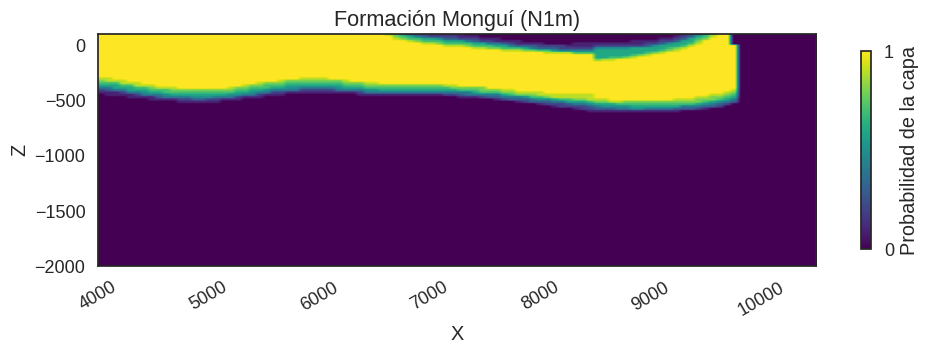

In [80]:
layer = 1
p2dp = gp.plot_2d(geo_model,
                  show_lith=False, show_boundaries=False,
                  show_data=False,
                  regular_grid=prob_block[layer],
                  kwargs_regular_grid={'cmap': 'viridis', 'norm': None})

prob_min = prob_block[layer].min()  # Minimum value of probability
prob_max = prob_block[layer].max()  # Maximum value of probability

# Create some sample data
data = np.random.rand(50, 50)

# Create plot
mappable = plt.imshow(data, cmap='viridis')
plt.title('Formación Monguí (N1m)')
colorbar = plt.colorbar(mappable, shrink=0.3)
colorbar.set_ticks([0, 1])   # Define ticks location
colorbar.set_label('Probabilidad de la capa')  

# Save plot
plt.savefig('Probabilidad_N1m_GO.png', dpi=300, bbox_inches='tight')
plt.show()

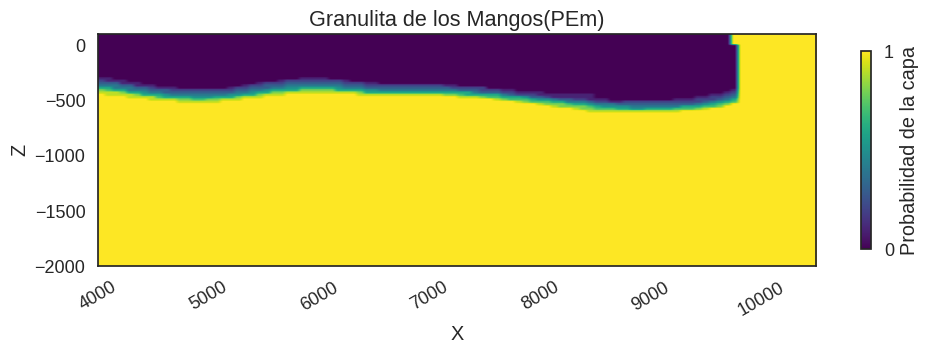

In [81]:
layer = 2
p2dp = gp.plot_2d(geo_model,
                  show_lith=False, show_boundaries=False,
                  show_data=False,
                  regular_grid=prob_block[layer],
                  kwargs_regular_grid={'cmap': 'viridis', 'norm': None})

prob_min = prob_block[layer].min()  # Minimum value of probability
prob_max = prob_block[layer].max()  # Maximum value of probability

# Create some sample data
data = np.random.rand(50, 50)

# Create plot
mappable = plt.imshow(data, cmap='viridis')
plt.title('Granulita de los Mangos(PEm)')
colorbar = plt.colorbar(mappable, shrink=0.3)
colorbar.set_ticks([0, 1])  # Define ticks location
colorbar.set_label('Probabilidad de la capa') 

# Save plot
plt.savefig('Probabilidad_PEm_GO.png', dpi=300, bbox_inches='tight')
plt.show()